# Exam -  Friday 17, June 2020 - solutions

**Scientific Programming - Data Science @ University of Trento**

## [Download exercises and solutions](../../_static/datasciprolab-2020-07-17-exam.zip)

## Introduction

* **Taking part to this exam erases any vote you had before**



### Grading


* **Correct implementations**: Correct implementations with the required complexity grant you full grade.
* **Partial implementations**: Partial implementations _might_ still give you a few points. If you just can't solve an exercise,  try to solve it at least for some subcase (i.e. array of fixed size 2) commenting why you did so. 

### Valid code

<div class="alert alert-warning">

**WARNING**: MAKE SURE ALL EXERCISE FILES AT LEAST COMPILE !!! 
10 MINS BEFORE THE END OF THE EXAM I WILL ASK YOU TO DO A FINAL CLEAN UP OF THE CODE 
</div>



<div class="alert alert-warning">

**WARNING**: _ONLY_ IMPLEMENTATIONS OF THE PROVIDED FUNCTION SIGNATURES WILL BE EVALUATED !!!!!!!!! <br/>    

</div>


For example, if you are given to implement: 

```python
    def f(x):
        raise Exception("TODO implement me")
```

and you ship this code:

``` python
def my_f(x):
    # a super fast, correct and stylish implementation

def f(x):
    raise Exception("TODO implement me")
```

We will assess only the latter one `f(x)`, and conclude it doesn't work at all :P   !!!!!!!

**Helper functions**

Still, you are allowed to define any extra helper function you might need. If your `f(x)` implementation calls some other function you defined like `my_f` here, it is ok:

```python
# Not called by f, will get ignored:
def my_g(x):
    # bla

# Called by f, will be graded:
def my_f(y,z):
    # bla

def f(x):
    my_f(x,5)
```

### How to edit and run

To edit the files, you can use any editor of your choice,  you can find them under _Applications->Programming_:

* **Visual Studio Code**
* Editra is easy to use, you can find it under _Applications->Programming->Editra_.
* Others could be _GEdit_ (simpler), or _PyCharm_ (more complex).

To run the tests, use **the Terminal** which can be found in _Accessories -> Terminal_ 



<div class="alert alert-info">

**IMPORTANT**: Pay close attention to the comments of the functions.
</div>

<div class="alert alert-warning">

**WARNING**: _DON'T_ modify function signatures! Just provide the implementation.
</div>

<div class="alert alert-warning">

**WARNING**: <i>DON'T</i> change the existing test methods, just add new ones !!!  You can add as many as you want.
</div>

<div class="alert alert-warning">

**WARNING**: _DON'T_ create other files. If you still do it, they won't be evaluated.
</div>




### Debugging 

If you need to print some debugging information, you are allowed to put extra <code>print</code>
    statements in the function bodies.


<div class="alert alert-warning">

**WARNING:** even if print statements are allowed, be careful with prints that might
     break your function! 
</div>


For example, avoid stuff like this: 

```python
x = 0
print(1/x)
```


### What to do

1) Download  `datasciprolab-2020-07-17-exam.zip` and extract it <b>on your desktop</b>. Folder content should be like this:

```

datasciprolab-2020-07-17-FIRSTNAME-LASTNAME-ID
   exam-2020-07-17-exercise.ipynb
   theory.txt
   office_queue_exercise.py
   office_queue_test.py   
```

2) Rename `datasciprolab-2020-07-17-FIRSTNAME-LASTNAME-ID` folder: put your name, lastname an id number, like `datasciprolab-2020-07-17-john-doe-432432`

From now on, you will be editing the files in that folder. At the end of the exam, that is what will be evaluated.

3) Edit the files following the instructions in this worksheet for each exercise. Every exercise should take max 25 mins. If it takes longer, leave it and try another exercise.

4) When done:

- if you have unitn login:  zip and send to [examina.icts.unitn.it/studente](http://examina.icts.unitn.it/studente)
  
- If you don't have unitn login: tell instructors and we will download your work manually

## Part A - NACE codes


https://ec.europa.eu/eurostat/ramon/nomenclatures/index.cfm?TargetUrl=LST_CLS_DLD&StrNom=NACE_REV2&StrLanguageCode=EN&StrLayoutCode=HIERARCHIC#

So you want to be a data scientist. Good, plenty of oopportunities ahead!

After graduating, you might discover though that many companies require you to actually work as a freelancer: you will just need to declare to the state which type of economic activity you are going to perform, they say. Seems easy, but you will soon encounter a pretty burocratic problem: do public institutions even _know_ what a data scientist is? If not, what is the closest category they recognize? Is there any specific _exclusion_ that would bar you from entering that category?

If you are in Europe, you will be presented with a catalog of economic activites you can choose from called [NACE](https://ec.europa.eu/eurostat/ramon/nomenclatures/index.cfm?TargetUrl=LST_NOM_DTL&StrNom=NACE_REV2&StrLanguageCode=EN&IntPcKey=&StrLayoutCode=HIERARCHIC), which is then further specialized by various states (for example Italy's catalog is called [ATECO](https://www.istat.it/it/archivio/17888))

### Sections

A NACE code is subdivided in a hierarchical, four-level structure. The categories at the highest level are called _sections_, here they are:

![](img/nace-sections.jpg)

### Section detail

If you drill down in say, section `M`, you will find something like this:

The first two digits of the code identify the _division_, the third digit identifies the _group_, and the fourth digit identifies the _class_:


![](img/example-nace.jpg)


Let's pick for example _Advertising agencies_, which has code `73.11`:

|Level|        |Code  |Spec | Description|
|--------|----|-|-|-|
|1|**Section** |**M**|a single alphabetic char| PROFESSIONAL, SCIENTIFIC AND TECHNICAL ACTIVITIES|
|2|**Division**|**73**|two-digits|Advertising and market research|
|3|**Group**| **73.1** |three-digits, with dot after first two|Advertising|
|4|**Class**| **73.12**|four-digits, with dot after first two|Advertising agencies|


### Specifications

<div class="alert alert-warning">
            
**WARNING: CODES MAY CONTAIN ZEROES!**


**IF YOU LOAD THE CSV IN LIBREOFFICE CALC OR EXCEL, MAKE SURE IT IMPORTS EVERYTHING AS STRING!**

**WATCH OUT FOR CHOPPED ZEROES !**

</div>

**Zero examples**:

* _Veterinary activities_ contains a double zero _at the end_: `75.00`  </li>
*  group _Manufacture of beverages_ contains a single zero at the end:  `11.0` </li>
*  _Manufacture of beer_ contains zero _inside_: `11.05` </li>
*  _Support services to forestry_ contains a zero _at the beginning_: `02.4` which is different from  `02.40` even if they have the same description ! 

**The section level code is not integrated in the NACE code**: For example, the activity _Manufacture of glues_ is identified by the code `20.52`, where `20` is the code for the division, `20.5` is the code for the group and `20.52` is the code of the class; section `C`, to which this class belongs, does not appear in the code itself.


**There may be gaps** (not very important for us): The divisions are coded consecutively. However, some "gaps" have been provided to allow the introduction of additional divisions without a complete change of the NACE coding. 

### NACE CSV

We provide you with a CSV  [NACE_REV2_20200628_213139.csv](NACE_REV2_20200628_213139.csv) that contains all the codes. Try to explore it with LibreOffice Calc or pandas

Here we show some relevant parts (**NOTE**: for part A you will **NOT** need to use pandas)

In [1]:

import pandas as pd   # we import pandas and for ease we rename it to 'pd'
import numpy as np    # we import numpy and for ease we rename it to 'np'

pd.set_option('display.max_colwidth', -1)           
df = pd.read_csv('NACE_REV2_20200628_213139.csv', encoding='UTF-8')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 10 columns):
Order                       996 non-null int64
Level                       996 non-null int64
Code                        996 non-null object
Parent                      975 non-null object
Description                 996 non-null object
This item includes          778 non-null object
This item also includes     202 non-null object
Rulings                     134 non-null object
This item excludes          507 non-null object
Reference to ISIC Rev. 4    996 non-null object
dtypes: int64(2), object(8)
memory usage: 77.9+ KB


In [2]:
df.head(5)

,Order,Level,Code,Parent,Description,This item includes,This item also includes,Rulings,This item excludes,Reference to ISIC Rev. 4
0,398481,1,A,NaN,"AGRICULTURE, FORESTRY AND FISHING","This section includes the exploitation of vegetal and animal natural resources, comprising the activities of growing of crops, raising and breeding of animals, harvesting of timber and other plants, animals or animal products from a farm or their natural habitats.",NaN,NaN,NaN,A
1,398482,2,01,A,"Crop and animal production, hunting and related service activities","This division includes two basic activities, namely the production of crop products and production of animal products, covering also the forms of organic agriculture, the growing of genetically modified crops and the raising of genetically modified animals. This division includes growing of crops in open fields as well in greenhouses.\n \nGroup 01.5 (Mixed farming) breaks with the usual principles for identifying main activity. It accepts that many agricultural holdings have reasonably balanced crop and animal production, and that it would be arbitrary to classify them in one category or the other.","This division also includes service activities incidental to agriculture, as well as hunting, trapping and related activities.",NaN,"Agricultural activities exclude any subsequent processing of the agricultural products (classified under divisions 10 and 11 (Manufacture of food products and beverages) and division 12 (Manufacture of tobacco products)), beyond that needed to prepare them for the primary markets. The preparation of products for the primary markets is included here.\n\nThe division excludes field construction (e.g. agricultural land terracing, drainage, preparing rice paddies etc.) classified in section F (Construction) and buyers and cooperative associations engaged in the marketing of farm products classified in section G. Also excluded is the landscape care and maintenance, which is classified in class 81.30.",01
2,398483,3,01.1,01,Growing of non-perennial crops,"This group includes the growing of non-perennial crops, i.e. plants that do not last for more than two growing seasons. Included is the growing of these plants for the purpose of seed production.",NaN,NaN,NaN,011
3,398484,4,01.11,01.1,"Growing of cereals (except rice), leguminous crops and oil seeds","This class includes all forms of growing of cereals, leguminous crops and oil seeds in open fields. The growing of these crops is often combined within agricultural units.\n\nThis class includes:\n- growing of cereals such as:\n . wheat\n . grain maize\n . sorghum\n . barley\n . rye\n . oats\n . millets\n . other cereals n.e.c.\n- growing of leguminous crops such as:\n . beans\n . broad beans\n . chick peas\n . cow peas\n . lentils\n . lupines\n . peas\n . pigeon peas\n . other leguminous crops\n- growing of oil seeds such as:\n . soya beans\n . groundnuts\n . castor bean\n . linseed\n . mustard seed\n . niger seed\n . rapeseed\n . safflower seed\n . sesame seed\n . sunflower seed\n . other oil seeds",NaN,NaN,"This class excludes:\n- growing of rice, see 01.12\n- growing of sweet corn, see 01.13\n- growing of maize for fodder, see 01.19\n- growing of oleaginous fruits, see 01.26",0111
4,398485,4,01.12,01.1,Growing of rice,This class includes:\n- growing of rice (including organic farming and the growing of genetically modified rice),NaN,NaN,NaN,0112


We can focus on just these columns:

In [3]:
selection = [398482,398488,398530,398608,398482,398518,398521,398567]

from IPython.display import display

example_df = df[['Order', 'Level','Code','Parent','Description','This item excludes']]
# Assuming the variable df contains the relevant DataFrame
example_df = example_df[example_df['Order'].isin(selection)]
display(example_df.style.set_properties(**{'white-space': 'pre-wrap',}))

,Order,Level,Code,Parent,Description,This item excludes
1,398482,2,01,A,"Crop and animal production, hunting and related service activities","Agricultural activities exclude any subsequent processing of the agricultural products (classified under divisions 10 and 11 (Manufacture of food products and beverages) and division 12 (Manufacture of tobacco products)), beyond that needed to prepare them for the primary markets. The preparation of products for the primary markets is included here. The division excludes field construction (e.g. agricultural land terracing, drainage, preparing rice paddies etc.) classified in section F (Construction) and buyers and cooperative associations engaged in the marketing of farm products classified in section G. Also excluded is the landscape care and maintenance, which is classified in class 81.30."
7,398488,4,01.15,01.1,Growing of tobacco,"This class excludes: - manufacture of tobacco products, see 12.00"
37,398518,4,01.64,01.6,Seed processing for propagation,"This class excludes: - growing of seeds, see groups 01.1 and 01.2 - processing of seeds to obtain oil, see 10.41 - research to develop or modify new forms of seeds, see 72.11"
40,398521,2,02,A,Forestry and logging,"Excluded is further processing of wood beginning with sawmilling and planing of wood, see division 16."
49,398530,2,03,A,Fishing and aquaculture,"This division does not include building and repairing of ships and boats (30.1, 33.15) and sport or recreational fishing activities (93.19). Processing of fish, crustaceans or molluscs is excluded, whether at land-based plants or on factory ships (10.20)."
86,398567,4,09.90,09.9,Support activities for other mining and quarrying,"This class excludes: - operating mines or quarries on a contract or fee basis, see division 05, 07 or 08 - specialised repair of mining machinery, see 33.12 - geophysical surveying services, on a contract or fee basis, see 71.12"
127,398608,4,11.03,11.0,Manufacture of cider and other fruit wines,"This class excludes: - merely bottling and labelling, see 46.34 (if performed as part of wholesale) and 82.92 (if performed on a fee or contract basis)"


## A1 extract_codes

Let's say European Commission wants to review the catalog to simplify it. One way to do it, could be to look for codes that have lots of exclusions, the reasoning being that trying to explain somebody something by stating what it is _not_ often results in confusion.

Implement following function which extracts codes from 'This item exclues' column cells. See asserts for examples.

In [4]:
def extract_codes(text):
    """Extracts all the NACE codes from given text (a single string), and RETURN a list of the codes
    
       - also extracts section letters
    """
    #jupman-raise
    ret = []
    
    words = [word.strip(';,.:()"\'') for word in text.split()]
    for i in range(len(words)):         
        
        if i < len(words) - 1 \
            and words[i].lower() == 'section' \
            and len(words[i+1]) == 1 \
            and words[i+1][0].isalpha():
            
            ret.append(words[i+1])
        else:
            for char in words[i]:
                found = False
                if char.isdigit():
                    found = True
                    break
            if found:
                ret.append(words[i])
    return ret
    #/jupman-raise

assert extract_codes('group 02.4') == ['02.4']
assert extract_codes('class 02.40') == ['02.40']
assert extract_codes('see 46.34') == ['46.34']
assert extract_codes('divisions 10 and 11') == ['10','11']
assert extract_codes('(10.20)') == ['10.20']
assert extract_codes('(30.1, 33.15)') == ['30.1', '33.15']
assert extract_codes('section A') == ['A']
assert extract_codes('in section G. Also') == ['G']
assert extract_codes('section F (Construction)') == ['F']

In [5]:
# MORE REALISTIC asserts: 

t01 = """Agricultural activities exclude any subsequent processing of the 
agricultural products (classified under divisions 10 and 11 (Manufacture of food 
products and beverages) and division 12 (Manufacture of tobacco products)), beyond 
that needed to prepare them for the primary markets. The preparation of products for
the primary markets is included here.

The division excludes field construction (e.g. agricultural land terracing, 
drainage, preparing rice paddies etc.) classified in section F (Construction) and buyers 
and cooperative associations engaged in the marketing of farm products classified 
in section G. Also excluded is the landscape care and maintenance,
which is classified in class 81.30.
"""
assert extract_codes(t01) == ['10','11','12','F','G','81.30']

t01_15 = """This class excludes:
- manufacture of tobacco products, see 12.00
"""
assert extract_codes(t01_15) == ['12.00']

t03 = """This division does not include building and repairing of ships and 
boats (30.1, 33.15) and sport or recreational fishing activities (93.19).
Processing of fish, crustaceans or molluscs is excluded, whether at land-based
plants or on factory ships (10.20).
"""

assert extract_codes(t03) == ['30.1', '33.15','93.19','10.20']

t11_03 = """This class excludes:
- merely bottling and labelling, see 46.34 (if performed as part of wholesale) 
and 82.92 (if performed on a fee or contract basis)
"""
assert extract_codes(t11_03) == ['46.34', '82.92']


t01_64 = """This class excludes:
- growing of seeds, see groups 01.1 and 01.2
- processing of seeds to obtain oil, see 10.41
- research to develop or modify new forms of seeds, see 72.11
"""
assert extract_codes(t01_64) == ['01.1','01.2','10.41','72.11']

t02 = """Excluded is further processing of wood beginning with sawmilling and planing of wood, 
see division 16.
"""
assert extract_codes(t02) == ['16']

t09_90 = """This class excludes:
- operating mines or quarries on a contract or fee basis, see division 05, 07 or 08
- specialised repair of mining machinery, see 33.12
- geophysical surveying services, on a contract or fee basis, see 71.12
"""
assert extract_codes(t09_90) == ['05','07','08','33.12','71.12']

## A2 build_db

Given a filepath pointing to a NACE CSV, reads the CSV and RETURN a dictionary mapping codes to dictionaries which hold the code descriptionn and a field with the list of excluded codes, for example:

```python
{'01': {'description': 'Crop and animal production, hunting and related service activities',
  'exclusions': ['10', '11', '12', 'F', 'G', '81.30']},
 '01.1': {'description': 'Growing of non-perennial crops', 'exclusions': []},
 '01.11': {'description': 'Growing of cereals (except rice), leguminous crops and oil seeds',
  'exclusions': ['01.12', '01.13', '01.19', '01.26']},
 '01.12': {'description': 'Growing of rice', 'exclusions': []},
 '01.13': {'description': 'Growing of vegetables and melons, roots and tubers',
  'exclusions': ['01.28', '01.30']},
 ...
 ...
}
```

The complete desired output is [in file expected_db.py](expected_db.py)

In [6]:
def build_db(filepath):
    #jupman-raise
    ret = {}
    import csv
    with open(filepath, encoding='utf-8', newline='') as f:    
        my_reader = csv.DictReader(f, delimiter=',')
        for d in my_reader:
            diz = {'description' : d['Description'],
                   'exclusions' : extract_codes(d['This item excludes'])}
            ret[d['Code']] = diz
    return ret
    #/jupman-raise
    
activities_db = build_db('NACE_REV2_20200628_213139.csv')    
#activities_db

## A3 plot

Implement function `plot` which given a `db` as created at previous point and a code `level` among 1,2,3,4, plots the number of exclusions for all codes of that level, sorted in reversed order. 

- don't forget title
- try to display labels nicely

(if you look at the graph, apparently European Union has a hard time defining what an artist is :-)

<div class="alert alert-warning">

**IMPORTANT: IF you couldn't implement the function build_db,  you will find still the complete desired output** [in file expected_db.py](expected_db.py), just copy paste it here.

</div>

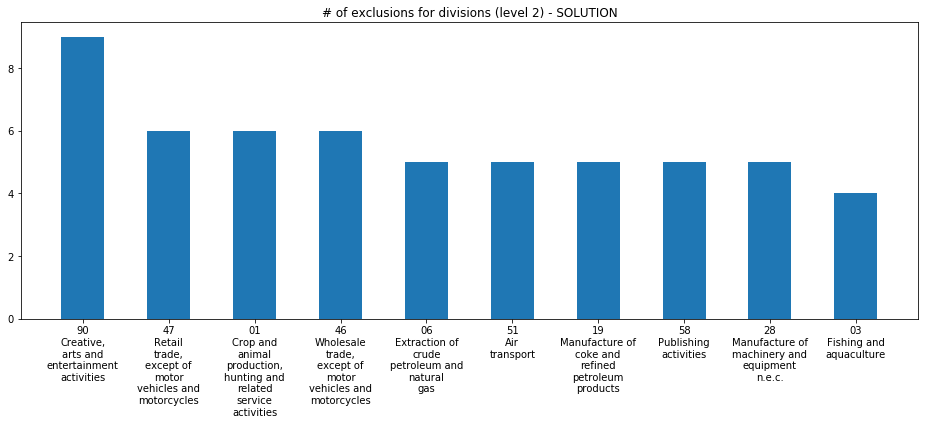

In [7]:
%matplotlib inline
def plot(db, level):    
    
    import matplotlib.pyplot as plt
    #jupman-raise
    
    coords = [(code, len(db[code]['exclusions'])) for code in db if len(code.replace('.','')) == level]
    coords.sort(key=lambda c: c[1], reverse=True)
    
    coords = coords[:10]
            
    xs = [c[0] for c in coords]
    ys = [c[1] for c in coords]

    fig = plt.figure(figsize=(13,6))  # width: 10 inches, height 3 inches


    plt.bar(xs, ys, 0.5, align='center')
    
    def fix_label(label):
        # coding horror, sorry
        return label.replace(' ','\n').replace('\nand\n',' and\n').replace('\nof\n',' of\n')
    
    plt.xticks(xs, [c[0] + '\n' + fix_label(db[c[0]]['description']) for c in coords])   
    
    level_names = {
        1:'Section',
        2:'division',
        3:'Group',
        4:'Class'
    }
    plt.title("# of exclusions for %ss (level %s) - SOLUTION" % (level_names[level], level))
    #plt.xlabel('level_names[level]')
    #plt.ylabel('y')
    fig.tight_layout()
    plt.savefig('division-exclusions-solution.png')
    plt.show()
    
    #/jupman-raise

plot(activities_db, 2)

![excl](division-exclusions-solution.png)

## Part B

 ### B1 Theory

**Write the solution in separate** `theory.txt` **file**

### B1.1 complexity

Given a list `L` of `n` elements, please compute the asymptotic computational complexity of the following function, explaining your reasoning.

```python
def my_fun(L):
    n = len(L)
    if n <= 1:
        return 1
    else:
        L1 = L[0:n//2]
        L2 = L[n//2:]
        a = my_fun(L1) + min(L1) - n
        b = my_fun(L2) + min(L2) - n
        return a + b 
```
     
### B1.2 describe
Briefly describe what a hash table is and provide an example of its usage.

## B2 - OfficeQueue


An office offers services `'x'`, `'y'` and `'z'`. When people arrive at the office, they state which service they need, get a ticket and enqueue. Suppose at the beginning of the day we are considering there is only one queue. 

The office knows on average how much time each service requires:

In [8]:
SERVICES = { 'x':5,   # minutes
             'y':20,
             'z':30
           }


With this information it is able to inform new clients approximately how long they will need to wait.


`OfficeQueue` is implemented as a linked list, where people enter the queue from the tail and leave from the head. We can represent it like this (**NOTE**: 'cumulative wait' is not actually stored in the queue):

```
    wait time: 155 minutes
    
    cumulative wait:  5    10   15   45   50   55   85   105  110  130  150  155    
    wait times:       5    5    5    30   5    5    30   20   5    20   20   5
                      x    x    x    z    x    x    z    y    x    y    y    x
                      a -> b -> c -> d -> e -> f -> g -> h -> i -> l -> m -> n
                      ^                                                      ^
                      |                                                      |
                     head                                                   tail
```

Each node holds the client identifier `'a'`, `'b'`, `'c'`, and the service label (like `'x'`) requested by the client:

```python
class Node:
    def __init__(self, initdata, service):
        self._data = initdata
        self._service = service
        self._next = None        
```        

`OfficeQueue` keeps fields `_services`, `_size` and a field `_wait_time` which holds the total wait time of the queue:

```python
class OfficeQueue:    
    def __init__(self, services):
        self._head = None
        self._tail = None        
        self._size = 0
        self._wait_time = 0
        self._services = dict(services)
```

In [9]:
from office_queue_solution import *
SERVICES = { 'x':5,   # minutes
             'y':20,
             'z':30
           }


oq = OfficeQueue(SERVICES)
print(oq)

OfficeQueue: 
  
  


In [10]:
oq.enqueue('a','x')
oq.enqueue('b','x')
oq.enqueue('c','x')
oq.enqueue('d','z')
oq.enqueue('e','x')
oq.enqueue('f','x')
oq.enqueue('g','z')
oq.enqueue('h','y')
oq.enqueue('i','x')
oq.enqueue('l','y')
oq.enqueue('m','y')
oq.enqueue('n','x')

In [11]:
print(oq)

OfficeQueue: 
  x    x    x    z    x    x    z    y    x    y    y    x
  a -> b -> c -> d -> e -> f -> g -> h -> i -> l -> m -> n


In [12]:
oq.size()

12

Total wait time can be accessed from outside with the method `wait_time()`:

In [13]:
oq.wait_time()

155

<div class="alert alert-warning">

**ATTENTION**: you only need to implement the methods `time_to_service` and `split`

**DO NOT** touch other methods.

</div>

## B2.1 - time_to_service

Open file `office_queue_exercise.py` with and start editing.

In order to schedule work and pauses, for each service office employees want to know after how long they will have to process the first client requiring that particular service.           

First service encountered will always have a zero time interval (in this example it's `x`):


```
wait time: 155

cumulative wait:  5    10   15   45   50   55   85   105  110  130  150  155
wait times:       5    5    5    30   5    5    30   20   5    20   20   5
                  x    x    x    z    x    x    z    y    x    y    y    x
                  a -> b -> c -> d -> e -> f -> g -> h -> i -> l -> m -> n
                 ||              |                   |
                 x : 0           |                   |
                 |               |                   |
                 |---------------|                   |
                 |     z : 15                        | 
                 |                                   |
                 |-----------------------------------|
                                  y : 85
```

In [14]:
SERVICES = { 'x':5,   # minutes
             'y':20,
             'z':30
           }

oq = OfficeQueue(SERVICES)
print(oq)

OfficeQueue: 
  
  


In [15]:
oq.enqueue('a','x')
oq.enqueue('b','x')
oq.enqueue('c','x')
oq.enqueue('d','z')
oq.enqueue('e','x')
oq.enqueue('f','x')
oq.enqueue('g','z')
oq.enqueue('h','y')
oq.enqueue('i','x')
oq.enqueue('l','y')
oq.enqueue('m','y')
oq.enqueue('n','x')

print(oq)

OfficeQueue: 
  x    x    x    z    x    x    z    y    x    y    y    x
  a -> b -> c -> d -> e -> f -> g -> h -> i -> l -> m -> n


Method to implement will return a dictionary mapping each service to the time interval after which the service is first required:

In [16]:
oq.time_to_service()

{'x': 0, 'y': 85, 'z': 15}

### Services not required by any client

As a special case, if a service is not required by any client, its time interval is set to the queue total wait time (because a client requiring that service might still show up in the future and get enqueued)

In [17]:
    
oq = OfficeQueue(SERVICES)
oq.enqueue('a','x')   # completed after 5 mins
oq.enqueue('b','y')   # completed after 5 + 20 mins
print(oq)

OfficeQueue: 
  x    y
  a -> b


In [18]:
print(oq.wait_time())

25


In [19]:
oq.time_to_service()   # note z is set to total wait time

{'x': 0, 'y': 5, 'z': 25}


Now implement this:

```python
    def time_to_service(self):
        """ RETURN a dictionary mapping each service to the time interval after which
            the service is first required.

            - the first service encountered will always have a zero time interval
            - If a service is not required by any client, time interval is set to 
              the queue total wait time
            - MUST run in O(n) where n is the size of the queue.
        """
```        

**Testing**: `python3 -m unittest office_queue_test.TestTimeToService`


## B2.2 split

Suppose a new desk is opened: to reduce waiting times the office will comunicate on a screen to some people in the current queue to move to the new desk, thereby creating a new queue. The current queue will be split in two according to this criteria: after the cut, the total waiting time of the current queue should be the same or slightly bigger than the waiting time in the new queue:

<div class="alert alert-warning">
**ATTENTION**: This example is **different** from previous one (total wait time is 150 instead of 155)
</div>

```
ORIGINAL QUEUE:

wait time = 150 minutes
wait time / 2 = 75 minutes


cumulative wait:  30   50   80   110  115  120  140  145  150  
wait times:       30   20   30   30   5    5    20   5    5
                  z    y    z    z    x    x    y    x    x
                  a -> b -> c -> d -> e -> f -> g -> h -> i                    
                  ^            ^                          ^
                  |            |                          |
                 head       cut here                     tail


MODIFIED QUEUE: 

wait time: 80 minutes

wait times:       30   20   30   
cumulative wait:  30   50   80   
                  z    y    z    
                  a -> b -> c 
                  ^         ^  
                  |         |  
                 head      tail


NEW QUEUE: 

wait time: 75 minutes

wait times:       30   5    5    20   5    5
cumulative wait:  30   35   40   60   65   70
                  z    x    x    y    x    x
                  d -> e -> f -> g -> h -> i                    
                  ^                        ^
                  |                        |
                 head                     tail
```

Implement this method:

```python
    def split(self):
        """ Perform two operations:
            - MODIFY the queue by cutting it so that the wait time of this cut
              will be half (or slightly more) of wait time for the whole original queue
            - RETURN a NEW queue holding remaining nodes after the cut - the wait time of  
              new queue will be half (or slightly less) than original wait time

            - If queue to split is empty or has only one element, modify nothing
              and RETURN a NEW empty queue
            - After the call, present queue wait time should be equal or slightly bigger 
              than returned queue.
            - DO *NOT* create new nodes, just reuse existing ones
            - REMEMBER to set _size, _wait_time, _tail in both original and new queue
            - MUST execute in O(n) where n is the size of the queue
        """
```

**Testing**: `python3 -m unittest office_queue_test.SplitTest`

In [22]:
import sys
sys.path.append('../../')
import jupman

import office_queue_test

jupman.run(office_queue_test)

.................
----------------------------------------------------------------------
Ran 17 tests in 0.017s

OK
